## 调库

In [11]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

## 加载数据集

In [12]:
wine = load_wine()
print(f'所有特征:{wine.feature_names}')
x = pd.DataFrame(wine.data, columns = wine.feature_names)
y = pd.Series(wine.target)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

所有特征:['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [13]:
base_model = DecisionTreeClassifier(max_depth=1, criterion='gini', random_state=1).fit(x_train, y_train)
y_pred = base_model.predict(x_test)
print(f"决策树的准确率：{accuracy_score(y_test,y_pred):.3f}")

决策树的准确率：0.694


### DecisionTree参数
- criterion：gini(基尼系数),entropy(信息墒)
- splitter：best（在所有特征中找到最好的切分点，适合样本量不大的时候），random（部分特征中找到最好的切分点，适合样本数据量非常大）
- max_features：None（特征小于50的时候一般使用）,log2,sqrt,N
- max_depth：int，None，默认None，设置决策随机森林中的决策树的最大深度，深度越大，越容易过拟合，推荐树的深度为5～20之间
- min_samples_split：设置结点的最小样本数量，当样本数量可能小于此值时，结点将不会再划分
- min_samples_leaf：这个值限制了叶子节点最小的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝
- min_weight_fraction_leaf：这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝默认是0，就是不考虑权重问题。
- max_leaf_nodes：通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数
- class_weight：指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重，如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高
- min_impurity_split：这个值限制了决策树的增长，如果某节点的不纯度(基尼系数，信息增益，均方差，绝对差)小于这个阈值则该节点不再生成子节点。即为叶子节点

In [14]:
model = AdaBoostClassifier(base_estimator=base_model,
                           n_estimators=50,
                           learning_rate=0.5,
                           algorithm='SAMME.R',
                           random_state=1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(f'AdaBoost的准确率：{accuracy_score(y_test,y_pred):.3f}')

AdaBoost的准确率：0.972


### Adaboost参数
- base_estimator:基分类器，默认是决策树，在该分类器基础上进行boosting，理论上可以是任意一个分类器，但是如果是其它分类器是需要指明样本权重
- n_estimaotr:基分类器提升（循环次数），默认50次，这个值过大会造成过拟合；值过小，模型会容易欠拟合
- learning_rate:学习率，表示梯度收敛的速度，默认为1，如果过大容易错过最优质，过小收敛速度很；该值需要和n_estimators进行权重，当分类器迭代次数较少时，学习率可以小一些，当迭代次数较多时，学习率可以适当大一点
- algorithm:boosting算法，也就是模型提升准则，有两种方式SAMME, 和SAMME.R两种，默认是SAMME.R，两者的区别主要是弱学习器权重的度量，前者是对样本集预测错误的概率进行划分的，后者是对样本集的预测错误的比例，即错分率进行划分的，默认是用的SAMME.R
- random_state:随机种子设置
### Adaboost对象
- estimators_:以列表的形式返回所有的分类器
- classes_:类别标签
- estimator_weights_:每个分类器权重
- estimator_errors_:每个分类器的错分率，与分类器权重相对应
- feature_importances_:特征重要性，这个参数使用前提是基分类器也支持这个属性
### Adaboost方法
- decision_function(X):返回决策函数值（比如svm中的决策距离）
- fit(X,Y):在数据集（X,Y）上训练模型
- get_parms():获取模型参数
- predict(X):预测数据集X的结果
- predict_log_proba(X):预测数据集X的对数概率
- predict_proba(X):预测数据集X的概率值
- score(X,Y):输出数据集（X,Y）在模型上的准确率
- staged_decision_function(X):返回每个基分类器的决策函数值
- staged_predict(X):返回每个基分类器的预测数据集X的结果
- staged_predict_proba(X):返回每个基分类器的预测数据集X的概率结果
- staged_score(X, Y):返回每个基分类器的预测准确率

## 测试估计器个数的影响

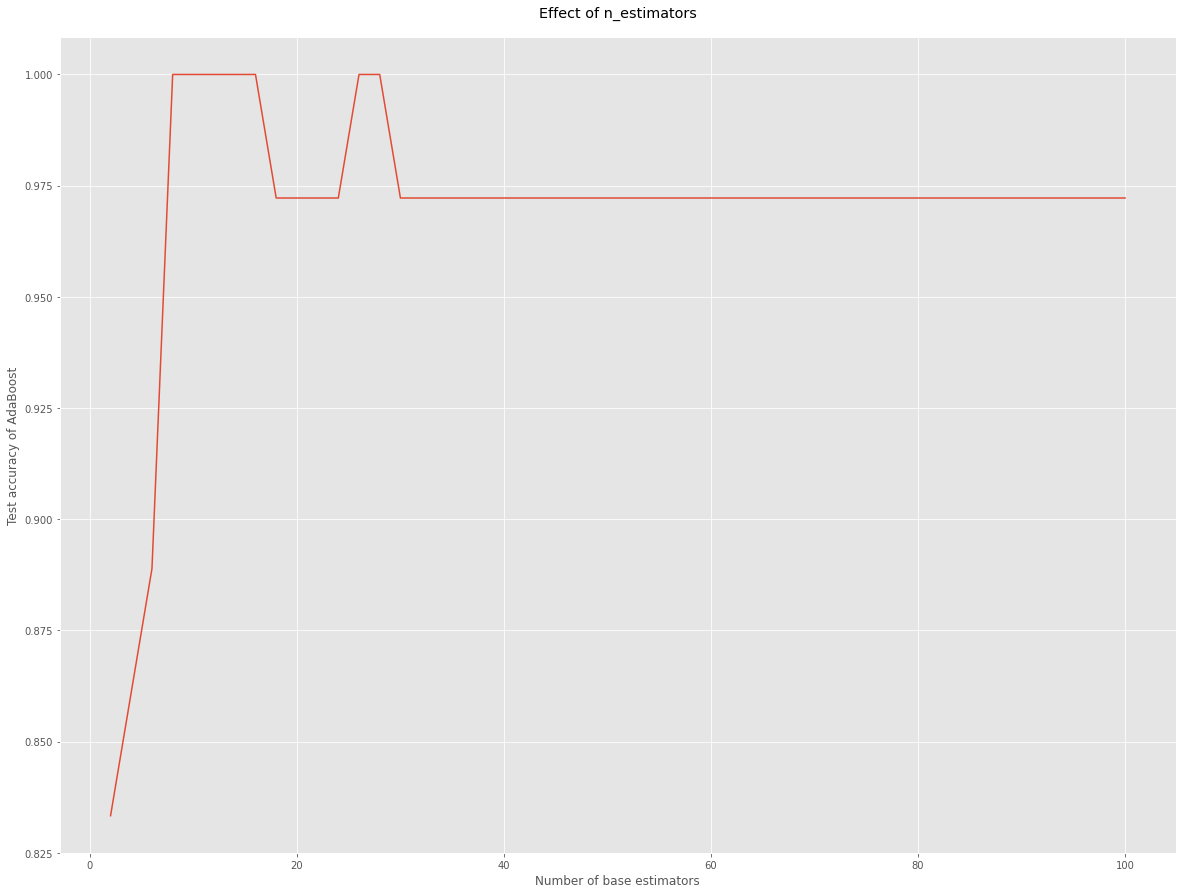

In [16]:
a = list(range(2,102,2))
b = []
for i in a:
    model = AdaBoostClassifier(base_estimator=base_model,
                               n_estimators=i,
                               learning_rate=0.5,
                               algorithm='SAMME.R',
                               random_state=1)
    model.fit(x_train, y_train)
    model_test_sc = accuracy_score(y_test, model.predict(x_test))
    b.append(model_test_sc)
plt.figure(figsize=(20,15))
plt.style.use('ggplot')
plt.title('Effect of n_estimators',pad=20)
plt.xlabel('Number of base estimators')
plt.ylabel('Test accuracy of AdaBoost')
plt.plot(a, b)
plt.show()

## 测试学习率的影响

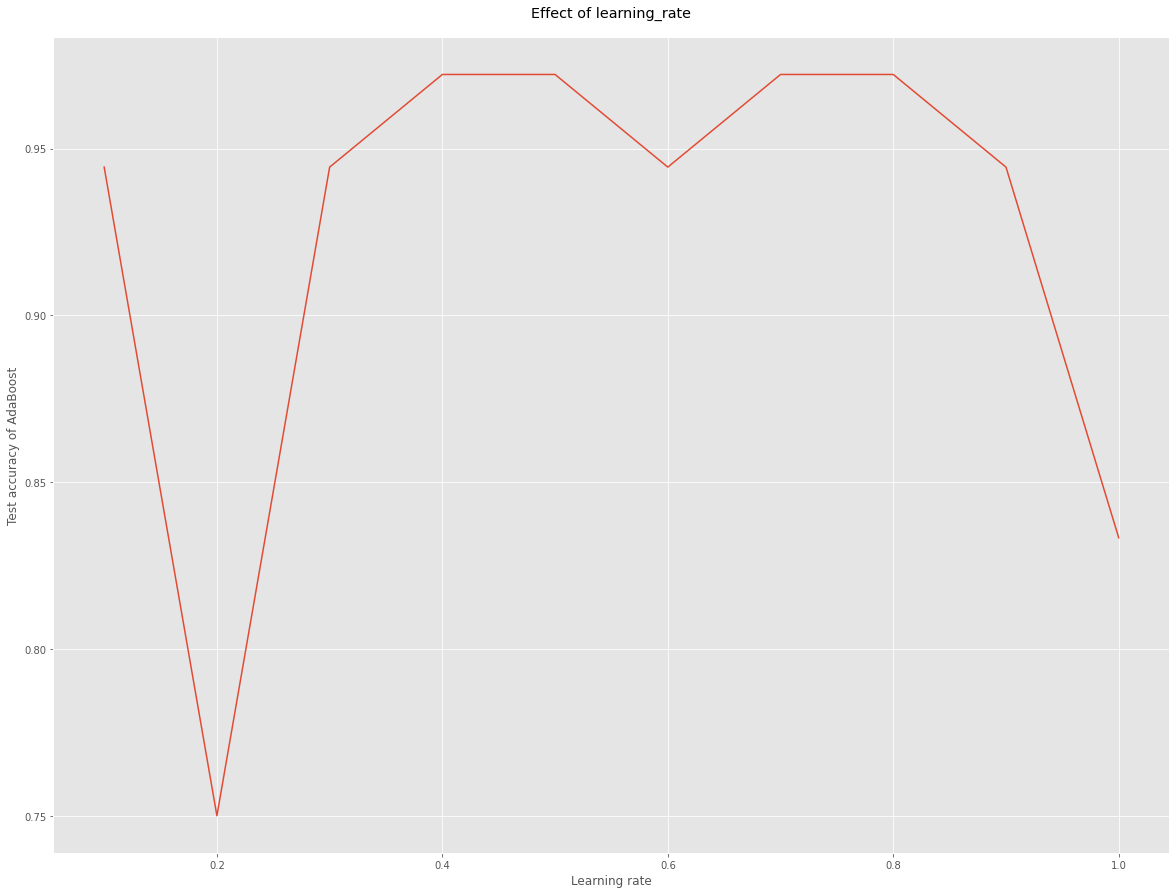

In [19]:
c = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
d = []
for i in c:
    model = AdaBoostClassifier(base_estimator=base_model,
                               n_estimators=50,
                               learning_rate=i,
                               algorithm='SAMME.R',
                               random_state=1)
    model.fit(x_train, y_train)
    model_test_sc = accuracy_score(y_test, model.predict(x_test))
    d.append(model_test_sc)
plt.figure(figsize=(20,15))
plt.title('Effect of learning_rate',pad = 20)
plt.xlabel('Learning rate')
plt.ylabel('Test accuracy of AdaBoost')
plt.plot(c,d)
plt.show()

## 使用GridSearchCV自动调参

In [20]:
hyperparameter_space = {'n_estimators':list(range(2, 102, 2)), 
                        'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

gs = GridSearchCV(AdaBoostClassifier(base_estimator=base_model,
                                     algorithm='SAMME.R',
                                     random_state=1),
                  param_grid=hyperparameter_space, 
                  scoring="accuracy", n_jobs=-1, cv=5)

gs.fit(x_train, y_train)
print("最优超参数:", gs.best_params_)

最优超参数: {'learning_rate': 0.8, 'n_estimators': 42}


> #### 为什么叫网格搜索(GridSearchCV)?
> - GridSearch即网格搜索，搜索的是参数，即在指定的参数范围内，按步长依次调整参数，利用调整的参数训练学习器，从所有的参数中找到在验证集上精度最高的参数，这其实是一个训练和比较的过程。    
> - GridSearchCV可以保证在指定的参数范围内找到精度最高的参数，但是这也是网格搜索的缺陷所在，他要求遍历所有可能参数的组合，在面对大数据集和多参数的情况下，非常耗时。
    
> #### GridSearchCV介绍
> - 它存在的意义就是自动调参，只要把参数输进去，就能给出最优化结果和参数。但是这个方法适合于小数据集，一旦数据的量级上去了，很难得到结果。这个时候就需要动脑筋了。数据量比较大的时候可以使用一个快速调优的方法——坐标下降。它其实是一种贪心算法：拿当前对模型影响最大的参数调参，直到最优化；再拿下一个影响最大的参数调优，如此下去，直到所有的参数调整完毕。这个方法的缺点就是可能会跳到局部最优而不是全局最优，但是省时间省力，巨大的优势面前，还是试一试，后续可以再拿bagging再优化。
> - 通常算法不够好，需要调试参数时必不可少。比如SVM的惩罚因子C，核函数kernel，gamma参数等，对于不同的数据使用不同的参数，结果效果可能差1~5个点，sklearn为我们专门调试参数的函数grid_search。    

> #### GridSearchCV参数
> ```
> class sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None,
> fit_params=None, n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0,
> pre_dispatch=‘2*n_jobs’, error_score=’raise-deprecating’, return_train_score=’warn’)
> ```
> - estimator：选择使用的分类器，并且传入除需要确定最佳的参数之外的其他参数。每一个分类器都需要一个scoring参数，或者score方法：如estimator = RandomForestClassifier(min_sample_split=100,min_samples_leaf = 20,max_depth = 8,max_features = 'sqrt' , random_state =10)
> - param_grid：需要最优化的参数的取值，值为字典或者列表，例如：param_grid = param_test1,param_test1 = {'n_estimators' : range(10,71,10)}
> - scoring = None ：模型评价标准，默认为None，这时需要使用score函数；或者如scoring = 'roc_auc'，根据所选模型不同，评价准则不同，字符串（函数名），或是可调用对象，需要其函数签名，形如：scorer(estimator，X，y）；如果是None，则使用estimator的误差估计函数
> - fit_para,s = None
> - n_jobs = 1 ： n_jobs：并行数，int：个数，-1：跟CPU核数一致，1：默认值
> - iid = True：iid：默认为True，为True时，默认为各个样本fold概率分布一致，误差估计为所有样本之和，而非各个fold的平均
> - refit = True ：默认为True，程序将会以交叉验证训练集得到的最佳参数，重新对所有可能的训练集与开发集进行，作为最终用于性能评估的最佳模型参数。即在搜索参数结束后，用最佳参数结果再次fit一遍全部数据集
> - cv = None：交叉验证参数，默认None，使用三折交叉验证。指定fold数量，默认为3，也可以是yield训练/测试数据的生成器
> - verbose = 0 ,scoring = None，verbose：日志冗长度，int：冗长度，0：不输出训练过程，1：偶尔输出，>1：对每个子模型都输出
> - pre_dispatch = '2*n_jobs' ：指定总共发的并行任务数，当n_jobs大于1时候，数据将在每个运行点进行复制，这可能导致OOM，而设置pre_dispatch参数，则可以预先划分总共的job数量，使数据最多被复制pre_dispatch次    

> #### GridSearchCV方法
> - grid.fit()：运行网格搜索
> - grid_scores_：给出不同参数情况下的评价结果
> - best_params_：描述了已取得最佳结果的参数的组合
> - best_score_：提供优化过程期间观察到的最好的评分
> - cv_results_：具体用法模型不同参数下交叉验证的结果